In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.signal import find_peaks

from Stable_Change_Point_Detection import Change_Point_Detection
K, nn_rate, crit = 50, 0.1, 'AIC' # default parameters

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [3]:
# simulate a sequence of d-dim Gaussian distributions in order of G1, G2, G1, G2, G1, G2, G1
# n: sequence length of each segment; d: dimensionality; r: off-diagnal correlation
def simulation_off_diag_gaussian(n, d, r, seed=0):
    mean = np.repeat(0,d)
    S1=np.eye(d)
    S2=np.ones((d,d))*r
    S2[np.diag_indices_from(S2)] = 1

    np.random.seed(seed)
    X1 = np.random.multivariate_normal(mean, S1, n)
    X2 = np.random.multivariate_normal(mean, S2, n)
    X3 = np.random.multivariate_normal(mean, S1, n)
    X4 = np.random.multivariate_normal(mean, S2, n)
    X5 = np.random.multivariate_normal(mean, S1, n)
    X6 = np.random.multivariate_normal(mean, S2, n)
    X7 = np.random.multivariate_normal(mean, S1, n)

    data = np.row_stack((X1,X2,X3,X4,X5,X6,X7))

    return data

In [9]:
data = simulation_off_diag_gaussian(n=100, d=5, r=0.7)

voting = Change_Point_Detection(data, K=K, nn_rate=nn_rate, crit=crit)

ARI score: 0.7093267549525736


/tmp/ipykernel_568158/2919873531.py:10: PeakPropertyWarning: some peaks have a width of 0
  peaks, _ = find_peaks(vote_smooth, width=10, height=(0.05, None))


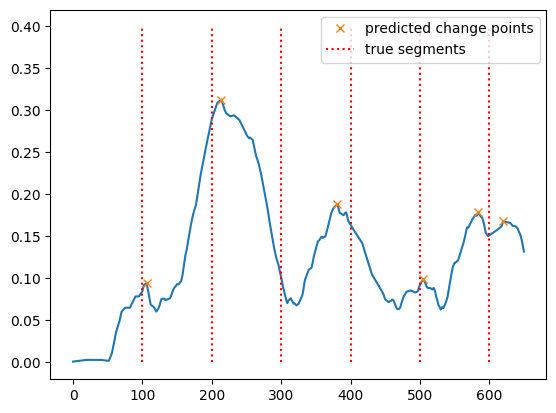

In [17]:
n=100
voting_over_time = np.zeros(n*7)
for k,v in voting.items():
    voting_over_time[k] = v
vote_smooth = moving_average(voting_over_time, 50) # smoothing function

peaks, _ = find_peaks(vote_smooth, width=10, height=(0.05, None)) # find local maximum

# generate predicted clusters based on estimated change points
pred_cluster = np.array([len(peaks)] * 7 * n)
for cp in peaks:
    pred_cluster[:cp] = pred_cluster[:cp] - 1
true_cluster = np.repeat(np.arange(7),n)
print('ARI score:', adjusted_rand_score(true_cluster, pred_cluster))

plt.plot(vote_smooth)
plt.plot(peaks, vote_smooth[peaks], "x", label='predicted change points')
plt.vlines(x=np.arange(1,7) * n, ymin=0, ymax=0.4, colors='red', linestyles='dotted', label='true segments')
plt.legend()
plt.show()

In [18]:
# simulate a sequence of student-t distributions in order of G1, G2, G1, G2, G1, G2, G1
# n: sequence length of each segment; m: mean; df: degree of freedom
def simulation_1D_student(n, m, df, seed=0):
    np.random.seed(seed)
    X1 = np.random.standard_t(5, n)
    X2 = np.random.standard_t(df, n) + m
    X3 = np.random.standard_t(5, n)
    X4 = np.random.standard_t(df, n) + m
    X5 = np.random.standard_t(5, n)
    X6 = np.random.standard_t(df, n) + m
    X7 = np.random.standard_t(5, n)

    data=np.concatenate([X1,X2,X3,X4,X5,X6,X7]).reshape(-1, 1)

    return data

In [20]:
data2 = simulation_1D_student(n=100, m=0, df=3)

voting2 = Change_Point_Detection(data2, K=K, nn_rate=nn_rate, crit=crit)

ARI score: 0.5156493762954377


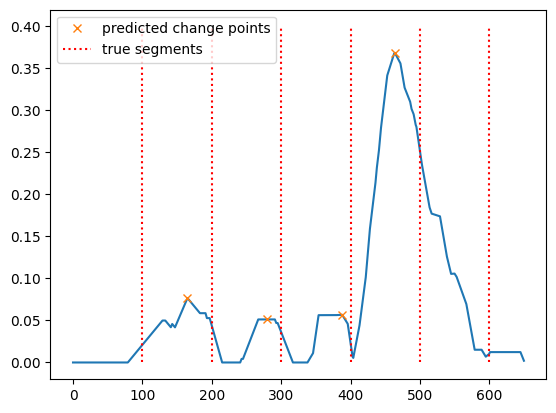

In [21]:
n=100
voting_over_time = np.zeros(n*7)
for k,v in voting2.items():
    voting_over_time[k] = v
vote_smooth = moving_average(voting_over_time, 50) # smoothing function

peaks, _ = find_peaks(vote_smooth, width=10, height=(0.05, None)) # find local maximum

# generate predicted clusters based on estimated change points
pred_cluster = np.array([len(peaks)] * 7 * n)
for cp in peaks:
    pred_cluster[:cp] = pred_cluster[:cp] - 1
true_cluster = np.repeat(np.arange(7),n)
print('ARI score:', adjusted_rand_score(true_cluster, pred_cluster))

plt.plot(vote_smooth)
plt.plot(peaks, vote_smooth[peaks], "x", label='predicted change points')
plt.vlines(x=np.arange(1,7) * n, ymin=0, ymax=0.4, colors='red', linestyles='dotted', label='true segments')
plt.legend()
plt.show()